### Advance EDA in python on road safety dataset

### Structure Investigation

Exploring the general shape of the dataset as well as the data type of your features

### Quality Invetsigation

- check for missing values
- duplicates
- unwanted entries

### Content Investigation
- explore feature values
- look at how different feature related to each other

https://medium.com/epfl-extension-school/advanced-exploratory-data-analysis-eda-with-python-536fa83c578a

### Load the dataset

In [1]:
from sklearn.datasets import fetch_openml

# download the dataset from openml
dataset= fetch_openml(data_id=42803, as_frame=True)

# Extract feature matrix X and show 5 random samples
df_X=dataset['frame']

### Structure Investigation

In [2]:
# shape of dataset

df_X.shape

(363243, 67)

In [3]:
import pandas as pd 


In [4]:
## Count how many times each data type is present on the dataframe

df_X.dtypes.value_counts()

float64    61
object      6
dtype: int64

### 1.1 Structure of non-numerical feature

In [5]:
df_X.describe(exclude='number')

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,363243,319866,319822,319866,298758
unique,140056,3,365,1439,204,25979
top,201543P296025,1.0,14/02/2015,17:30,E10000017,E01028497
freq,1332,238639,2144,2972,8457,1456


### 1.2 Structure of numerical feature

<AxesSubplot:title={'center':'Unique values per feature'}>

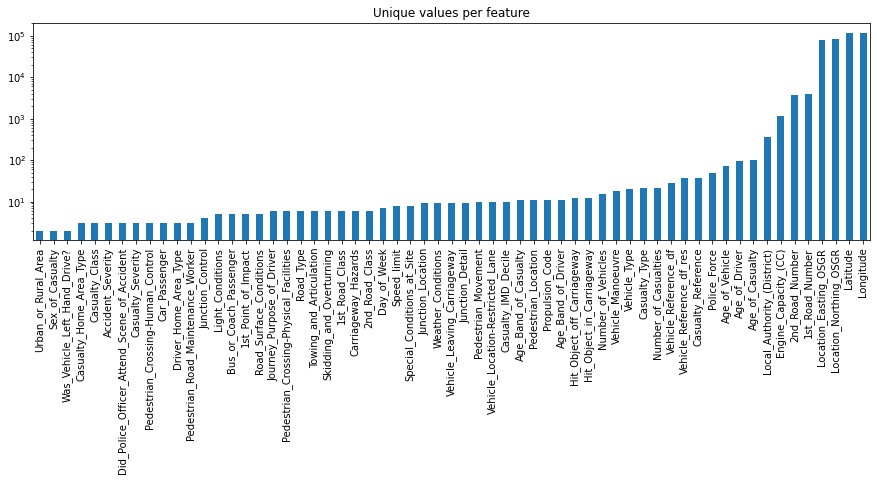

In [6]:
# for each numerical feature compute number of unique entries

unique_values=df_X.select_dtypes(include='number').nunique().sort_values()

# plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature")

### 2 Quality Investigation

### 2.1 duplicates

In [7]:
# Check duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicate entries")

## Extract column name for all features except  Accident_Index
columns_to_consider=df_X.drop(labels=['Accident_Index'], axis=1).columns

# drop duplicates based on columns to consider

df_X=df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

You seem to have 22 duplicate entries


(363221, 67)

### 2.2 Missing Values

#### 2.2.1. Per sample

Text(0, 0.5, 'Sample Number')

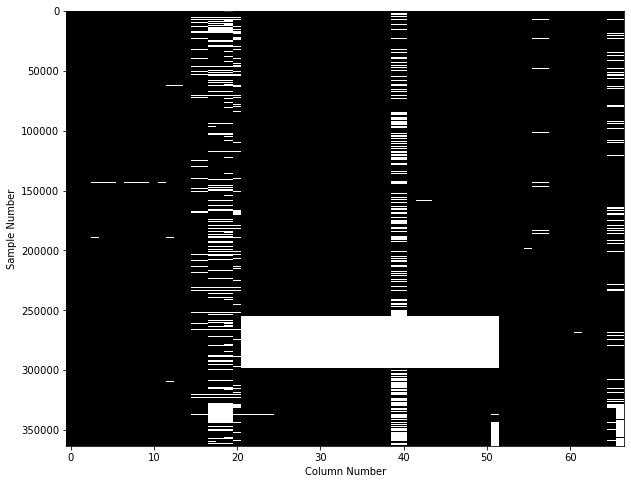

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")


In [12]:
df_X.isnull().sum()

Accident_Index                            0
Vehicle_Reference_df_res                  0
Vehicle_Type                             62
Towing_and_Articulation                 379
Vehicle_Manoeuvre                       184
                                      ...  
Bus_or_Coach_Passenger                   46
Pedestrian_Road_Maintenance_Worker      166
Casualty_Type                             0
Casualty_Home_Area_Type               39792
Casualty_IMD_Decile                   69574
Length: 67, dtype: int64

In [16]:
# pip install missingno

#### 2.2.2. Per Feature

<AxesSubplot:title={'center':'Percntage of missing values per Feature'}, ylabel='Ratio of missing values per Feature'>

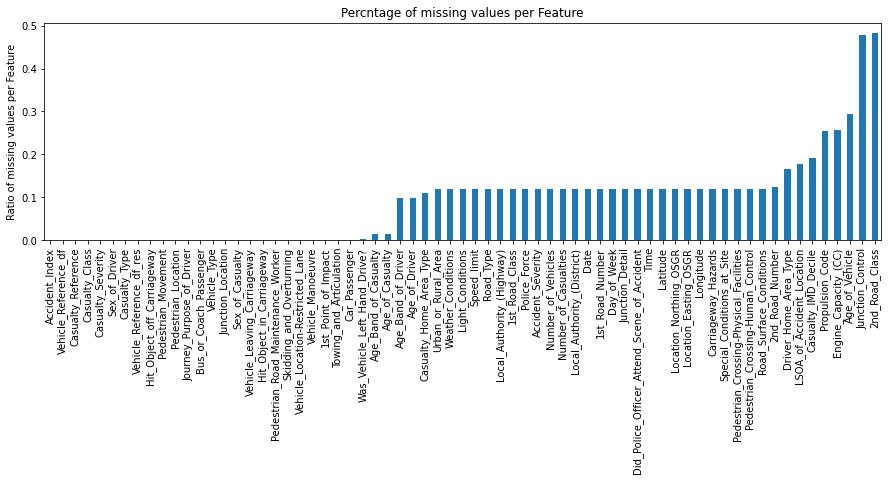

In [17]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15,4), 
    title="Percntage of missing values per Feature",
    ylabel="Ratio of missing values per Feature"
)

In [18]:
df_X=df_X.dropna(thresh=df_X.shape[0] *0.85, axis=1)
df_X.shape

(363221, 59)

In [19]:
df_X.shape[0]

363221

### 2.3. Unwanted entries and recording errors
#### 2.3.1. Numerical features

To plot this global view of the dataset, at least for the numerical features, you can use pandas’ .plot() function and combine it with the following parameters:

lw=0: lw stands for line width. 0 means that we don't want to show any lines
marker=".": Instead of lines, we tell the plot to use . as markers for each data point
subplots=True: subplots tells pandas to plot each feature in a separate subplot
layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means "as many as needed", while the 2 means to use 2 columns per row.
figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplo

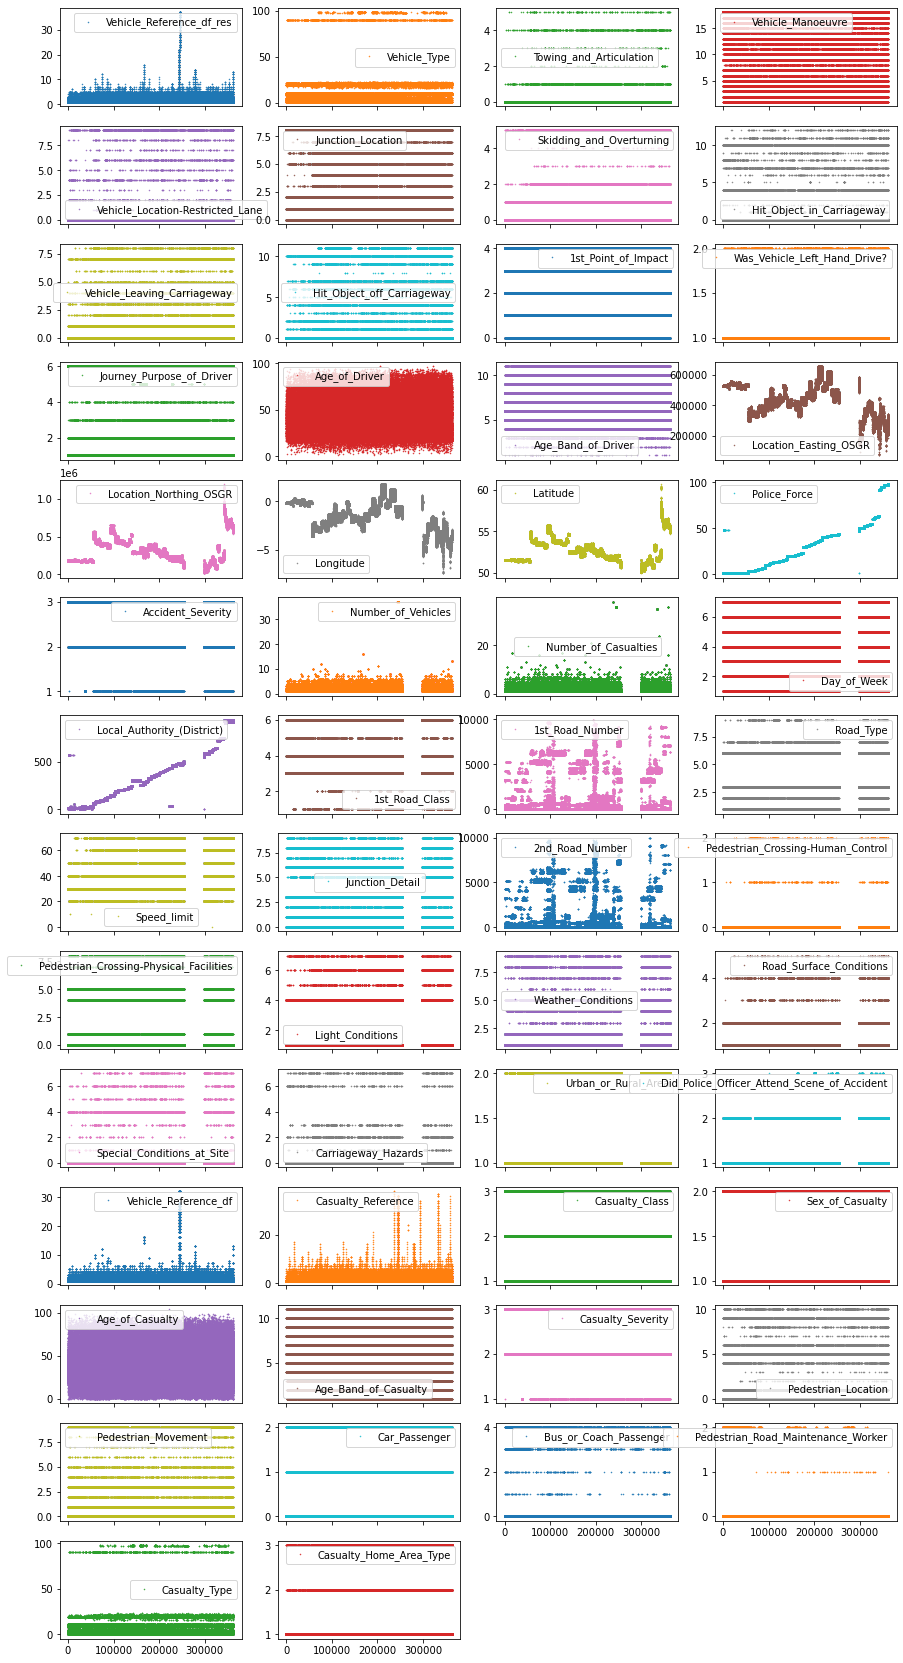

In [20]:
df_X.plot(lw=0, marker=".", subplots=True,
          layout=(-1, 4),
          figsize=(15,30),
          markersize=1
         )


#### 2.3.2. Non-numerical features

In [22]:
df_X.describe(exclude=["number", "datetime"])

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway)
count,363221,363221,319861,319817,319861
unique,140054,3,365,1439,204
top,201543P296025,1.0,14/02/2015,17:30,E10000017
freq,1332,238621,2144,2972,8457


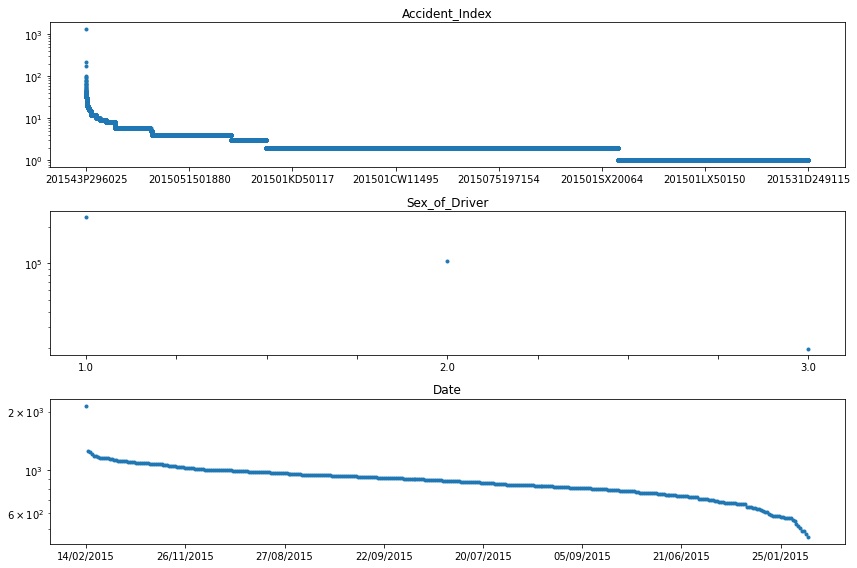

In [23]:
# Create a fig with 3 subplots
fig, axes=plt.subplots(ncols=1, nrows=3, figsize=(12,8))

#Identify non-numerical features
df_non_numerical= df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through each feature and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    # select one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(
        # Plot this information in a figure with log scaled y=axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
    plt.tight_layout()

In [24]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape



(360898, 59)

### 3. Content Investigation

#### 3.1. Feature distribution

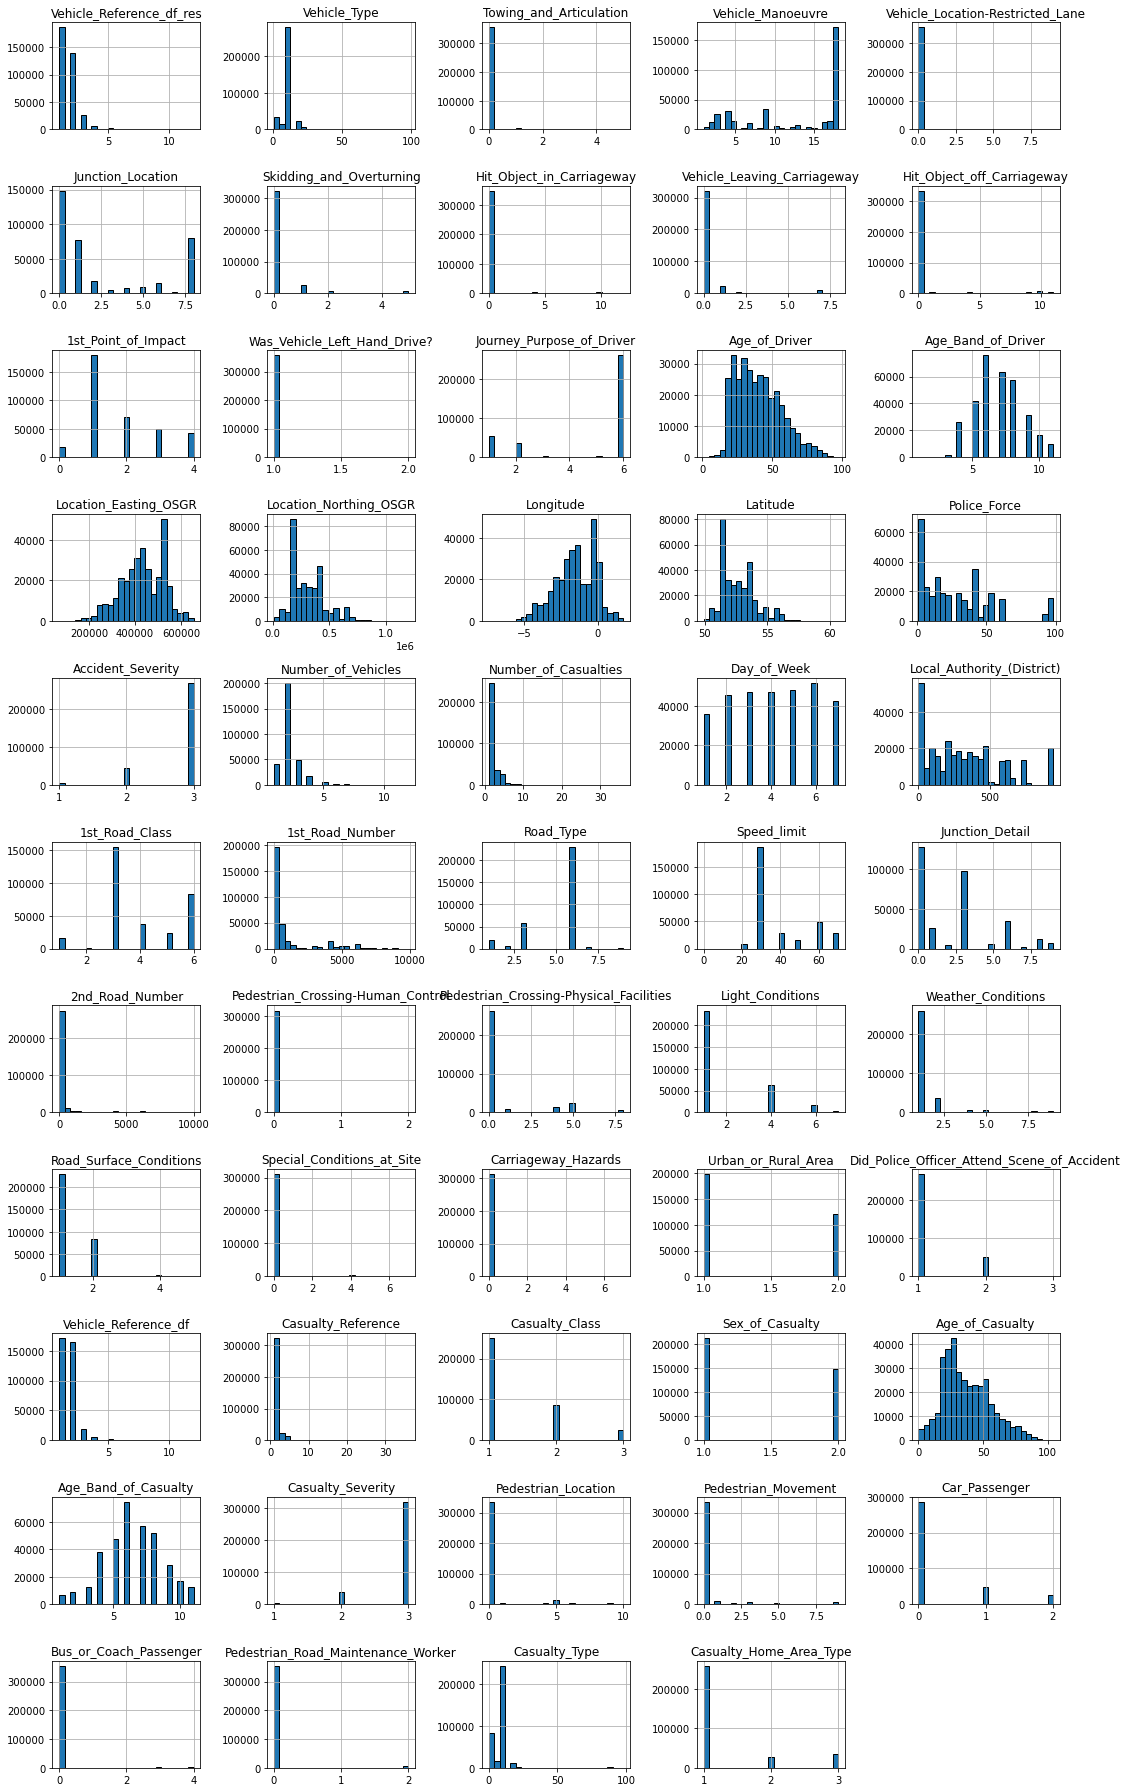

In [25]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [26]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));


ValueError: Unable to coerce to DataFrame, shape must be (360898, 59): given (2, 59)

### 3.2. Feature patterns

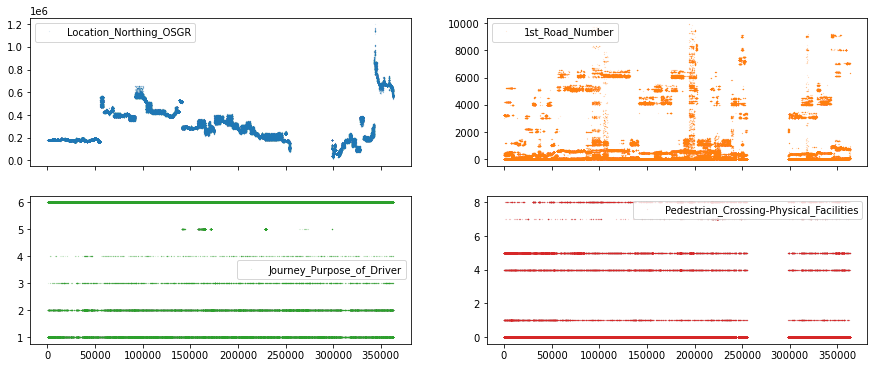

In [27]:
df_X[["Location_Northing_OSGR",
      "1st_Road_Number",
      "Journey_Purpose_of_Driver",
      "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
  markersize=0.1, figsize=(15, 6));

In [28]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25